<center>

# **Particle Swarm Optimization (PSO)**  

</center>

<center>

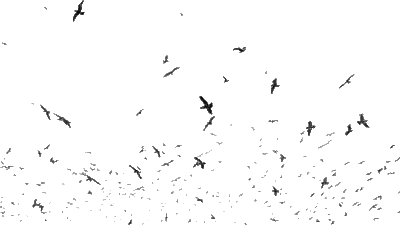

</center>

La Optimización de Partículas (PSO, por sus siglas en inglés) es un algoritmo de optimización inspirado en el comportamiento social de aves en bandada o peces en cardumen.

 Es un método computacional que optimiza un problema intentando mejorar iterativamente una solución candidata con respecto a una medida dada de calidad. PSO optimiza un problema teniendo una población de soluciones candidatas, denominadas partículas, y moviendo estas partículas alrededor en el espacio de búsqueda de acuerdo con fórmulas matemáticas simples sobre la posición y velocidad de la partícula. El movimiento de cada partícula está influenciado por su mejor posición local conocida pero también es guiado hacia las mejores posiciones conocidas en el espacio de búsqueda, las cuales se actualizan a medida que se encuentran mejores posiciones por otras partículas. Esto se espera que mueva el enjambre hacia las mejores soluciones.

$ \bar{v_i}^{t+1} $ $=$ <font color='green'>$w\bar{v_i}^t $</font> $+$ <font color='red'> $c_1r_1[ \bar{p_i}^t-\bar{x_i}^t ]$</font> $+$  <font color='blue'> $c_2r_2[\bar{G}^t - \bar{x_i}^t]$</font>

<font color='green'>componente de inercia: </font>Representa la velocidad actual de la partícula y proporciona la tendencia de la partícula a continuar en su dirección de movimiento actual. Este componente ayuda a mantener la exploración del espacio de búsqueda al no permitir que las partículas cambien de dirección demasiado bruscamente.

<font color='red'>componente cognitivo-personal: </font>  Refleja la experiencia personal de la partícula, es decir, se basa en la mejor posición que la partícula ha encontrado hasta ahora. Este componente guía a la partícula hacia su mejor posición conocida, fomentando la explotación de las áreas prometedoras del espacio de búsqueda.

<font color='blue'>componente social-global: </font> Se basa en la mejor posición encontrada por cualquier partícula en el enjambre hasta el momento. Este componente incentiva a las partículas a moverse hacia la mejor solución encontrada por el enjambre, facilitando la convergencia del enjambre hacia la solución óptima.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import copy
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import math
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2


x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x, y)


z = rosenbrock(x, y)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='turbo', edgecolor='none', alpha = 0.7)
ax.set_title('Función Rosenbrock')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

Z = rosenbrock(X, Y)

plt.figure(figsize=(4, 5))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 50), cmap='turbo', alpha = 0.7)

plt.title('Curvas de nivel')
plt.xlabel('eje X')
plt.ylabel('eje Y')

plt.show()

In [ ]:
def rastrigin(X, Y, A=10):
    return A + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

Z = rastrigin(X, Y)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='turbo', edgecolor='none', alpha = 0.7)


fig.colorbar(surf, shrink=0.5, aspect=5)


ax.set_title('Función Rastrigin')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)

Z = rastrigin(X, Y)

plt.figure(figsize=(4, 5))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 50), cmap='turbo', alpha = 0.7)

plt.title('Curvas de nivel')
plt.xlabel('eje X')
plt.ylabel('eje Y')

plt.show()

In [ ]:
W = 0.5 # para la inercia
c1 = 0.8 # para el componente personal-cognitivo
c2 = 0.9 # para el componente social-global

In [ ]:
'''
Declaramos cuántas iteraciones queremos cómo máximo y
el número de párticulas para la optimización
'''
n_iteraciones = 50
n_particulas =30

Para nuestra implementación usaremos 3 clases:

* Partícula
* Espacio
* Run : para correr nuestro programa

In [ ]:
'''
Creamos una clase de particula, necesitamos especificar el tipo de función (Rosenbrock o Rastrigin) para inicializar aleatoriamente
la posición de las partículas en el espacio de búsqueda, también necesitamos explicar sobre cuántas dimensiones estaremos trabajando
'''
class Particula():

  def __init__(self,funcion, n_dimensiones, seed):

    self.funcion = funcion
    self.n_dimensiones = n_dimensiones
    # Semilla para obtener los mismos valores generados por random
    self.seed = seed
    posiciones = [] # vector de posiciones x1,..xn de la partícula
    if self.funcion == 'rosenbrock':
      '''
      Para poder generar el GIF (en 2 dimensiones), la función Rosenbrock debe estar definida en {(x,y): -2<x<2, -1<y<3}
                                                    la función Rastrigin debe estar definida en  {(x,y): -3<x,y<3}
      '''
      if self.n_dimensiones == 2:
        x = random.uniform(-2,2)
        y = random.uniform(-1, 3)
        posiciones.append(x)
        posiciones.append(y)
      else: # si nos encontramos en una dimensión mayor a 2
        for p in range(self.n_dimensiones):
          posiciones.append(random.uniform(-3, 3))
    else: # caso Rastrigin
      for p in range(self.n_dimensiones):
          posiciones.append(random.uniform(-3, 3))
    self.posicion = np.array(posiciones)
    self.mejor_posicion_Personal = self.posicion
    self.mejor_valor_Personal = float('inf') # inicializamos en infinito, (este nunca será el mínimo)
    self.velocidad = np.zeros(n_dimensiones) # el vector de velocidad al comienzo debe estar inicializado con ceros (no nos estamos moviendo)

  # función para actualizar la posición de la partícula en el espacio de búsqueda
  def actualizar(self):
    self.posicion = self.posicion + self.velocidad # movemos la partícula en dirección del vector de velocidad

In [ ]:
'''
La clase de espacio es donde se estarán moviendo las partículas intentado encontrar el mínimo de la función
'''
class Espacio():

  def __init__(self, n_particulas, funcion, n_dimensiones, seed):
    self.funcion = funcion
    self.n_dimensiones = n_dimensiones
    self.n_particulas = n_particulas
    self.particulas = []
    self.mejor_valor_Global = float('inf')
    self.mejor_posicion_Global = np.array([random.uniform(-1,2) for i in range(self.n_dimensiones)])
    self.seed = seed

  '''
  Definimos las dos funciones que consideraremos para la optimización:
  '''
  def rosenbrock(self,x):
    y = [100.0*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1)]
    return np.array(y).sum()

  def rastrigin(self,x):
    y = [i**2 - 10*np.cos(2*math.pi*i ) for i in x]
    y = np.array(y).sum() + 10 * len(y)
    return y

  # el fitness evalúa la posición de la partícula en la función en cuestión
  def fitness(self, particula):
    posiciones = []
    for i in range(particula.n_dimensiones):
      posiciones.append(particula.posicion[i])
    if self.funcion == 'rosenbrock':
      return self.rosenbrock(posiciones)
    return self.rastrigin(posiciones)

  # buscamos el mínimo valor del fitness evaluado en alguna partícula de la iteración
  def set_mejor_Global(self):
    for particula in self.particulas:
      mejor_candidato_fitness = self.fitness(particula)
      if (self.mejor_valor_Global > mejor_candidato_fitness): # actualizamos el mínimo global encontrado hasta el momento
        self.mejor_valor_Global = mejor_candidato_fitness
        self.mejor_posicion_Global = particula.posicion

  # nos fijamos si para la iteración en cuestión, el fitness es mejor que el valor más pequeño encontrado hasta el momento por
  # cada partícula
  def set_mejor_Personal(self):
    for particula in self.particulas:
      candidato_fitness = self.fitness(particula)
      if (particula.mejor_valor_Personal > candidato_fitness): # actualizamos el mínimo personal de cada partícula si es necesario
        particula.mejor_valor_Personal = candidato_fitness
        particula.mejor_posicion_Personal = particula.posicion

  '''
  En cada iteración debemos actualizar la posición de cada partícula teniendo en cuenta la ecuación que exhibimos arriba,
  (la inercia, el componente social y el componente personal)
  '''
  def actualizar_particulas(self):
    for particula in self.particulas:
      global W
      inercia = W * particula.velocidad
      # r1 y r2 son valores aleatorios entre 0 y 1
      cognitivo_personal = c1 * random.random() * (particula.mejor_posicion_Personal - particula.posicion)
      social = c2 * random.random() * (self.mejor_posicion_Global - particula.posicion)
      nueva_velocidad = inercia + cognitivo_personal + social # actualizamos la velocidad de la partícula (hacia dónde se tiene que mover)
      particula.velocidad = nueva_velocidad
      particula.actualizar()

  '''
  la siguiente función nos ayudará a crear el GIF
  '''
  def mostrar_particulas(self):

    if self.n_dimensiones == 2: # solo creamos el GIF para dos dimensiones
      if self.funcion == 'rastrigin':
        x = np.linspace(-4, 4, 100)
        y = np.linspace(-4, 3, 100)
        x, y = np.meshgrid(x, y)
        z = [self.rastrigin([x[i,j],y[i,j]]) for i in range(100) for j in range(100)]
        z = np.array(z).reshape([100,100])
      else:
        x = np.linspace(-2, 2, 400)
        y = np.linspace(-1, 3, 400)
        x, y = np.meshgrid(x, y)
        z = [self.rosenbrock([x[i,j],y[i,j]]) for i in range(400) for j in range(400)]
        z = np.array(z).reshape([400,400])

      contour = plt.contour(x, y, z, levels=np.logspace(-1, 3, 50), cmap='turbo', alpha = 0.7) # graficamos las curvas de nivel
      plt.title(self.funcion.capitalize())
      plt.xlabel('X')
      plt.ylabel('Y')

      # graficamos cada partícula
      for particula in self.particulas:
        plt.plot(particula.posicion[0], particula.posicion[1],marker = 'o',markersize = 5, color = 'cadetblue')

      # mostramos la mejor solución encontrada hasta el momento (en forma de estrella)
      plt.plot(self.mejor_posicion_Global[0], self.mejor_posicion_Global[1], marker = '*', markersize=10, color = 'gold') #mostramos la mejor posición


  def mostrar_particulas_3D(self):
    if self.n_dimensiones == 2:


      if self.funcion == 'rastrigin':
        x = np.linspace(-3, 3, 100)
        y = np.linspace(-3, 3, 100)
        x, y = np.meshgrid(x, y)
        z = [self.rastrigin([x[i,j],y[i,j]]) for i in range(100) for j in range(100)]
        z = np.array(z).reshape([100,100])
      else:
        x = np.linspace(-2, 2, 100)
        y = np.linspace(-1, 3, 100)
        x, y = np.meshgrid(x, y)
        z = [self.rosenbrock([x[i,j],y[i,j]]) for i in range(100) for j in range(100)]
        z = np.array(z).reshape([100,100])

      # Coordenadas de los puntos
      all_points_x = []
      all_points_y = []
      all_points_z = []


      # Añadimos la superficie al plot
      fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Turbo', opacity=0.7)])

      for particula in self.particulas:
        all_points_x.append(particula.posicion[0])
        all_points_y.append(particula.posicion[1])
        all_points_z.append(self.fitness(particula))


      # Añadimos los puntos
      fig.add_trace(go.Scatter3d(x=all_points_x, y=all_points_y, z=all_points_z,
                                mode='markers', marker=dict(size=4, color='forestgreen')))

      # Updating the layout of the plot
      fig.update_layout(title='Rosenbrock Function with Multiple Points', autosize=False,
                        width=500, height=500,
                        margin=dict(l=65, r=50, b=65, t=90))
      fig.show()



In [ ]:
'''
esta clase corre nuestro programa,
crea una instancia del espacio de búsqueda y la inicializa con un vector de partículas

NOTA: cada frame para a animación será una instancia específica de la clase de Espacio() en una iteración específica, sobre
la cual podemos llamar el método .mostar_particulas() para graficar el estado actual de la optimización

'''
class run():
  # los parámetros son:
  # número de partículas, tipo de funcion 'rosenbrock' o 'rastrigin', número de dimensiones, semilla, animación (True o False)
  # animación muestra o no la optimización de la superficie en un espacio tri dimensional (imprime cada iteración)
  def __init__(self, n_particulas, funcion, dimensiones, seed, animacion):
    self.n_particulas = n_particulas
    self.funcion = funcion
    self.dimensiones = dimensiones
    self.seed = random.seed(seed)
    self.animacion = animacion

    espacio_de_busqueda = Espacio(self.n_particulas,self.funcion,self.dimensiones, self.seed) # instancia del espacio de búsqueda
    vector_de_particulas = [Particula(self.funcion,self.dimensiones,self.seed) for _ in range(espacio_de_busqueda.n_particulas)] # lista de partículas
    espacio_de_busqueda.particulas = vector_de_particulas

    iteracion = 0
    espacio_de_busqueda_actual = copy.deepcopy(espacio_de_busqueda) # para los frames de la animación
    self.my_frames = [espacio_de_busqueda_actual]
    while (iteracion < n_iteraciones):
      espacio_de_busqueda.set_mejor_Personal()
      espacio_de_busqueda.set_mejor_Global()
      if iteracion < 10 and self.animacion == True:
        espacio_de_busqueda.mostrar_particulas_3D()
        print()
      espacio_de_busqueda.actualizar_particulas() # cambiamos las partículas de posición
      espacio_de_busqueda_actual = copy.deepcopy(espacio_de_busqueda) # para los frames
      self.my_frames.append(espacio_de_busqueda_actual)
      iteracion += 1



    print("La mejor solucion es: ", espacio_de_busqueda.mejor_valor_Global, "en", iteracion, "iteraciones",
          "ocurre en la posición: ", espacio_de_busqueda.mejor_posicion_Global)

  # para animar el GIF (en 2 dimensiones)

  def animate(self):
    fig, ax = plt.subplots()
    #plt.figure(figsize=(6, 4))

    ax.set_aspect('equal')

    frames = self.my_frames

    def update(frame):
        ax.clear()

        frame.mostrar_particulas()



    ani = FuncAnimation(fig, update, frames=frames, repeat=True)
    ani_jshtml = ani.to_jshtml()
    plt.close()

    return HTML(ani_jshtml)

In [ ]:
PSO = run(30, 'rosenbrock', 2, 1972,True)

In [ ]:
PSO0 = run(43, 'rosenbrock', 2, 1937, False)

In [ ]:
PSO1 = run(43, 'rosenbrock', 2, 19, False)
PSO1.animate()

In [ ]:
PSO3 = run(n_particulas, 'rastrigin', 2, 2003, False)
PSO3.animate()

In [ ]:
PSO2 = run(n_particulas, 'rastrigin', 2, 2023, False)
PSO2.animate()

In [ ]:
PSO4 = run(250, 'rosenbrock',3)


In [ ]:
PSO5 = run(250, 'rastrigin', 3)